<a href="https://colab.research.google.com/github/AIMa-hash/testing-/blob/manish/trying_random_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

1.0373788922202499e-18 1.0185179881672439e-09


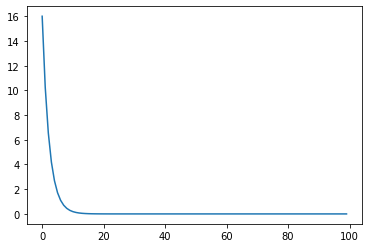

In [ ]:
w = 5
eta = 0.1
L = w**2
dw = 2*w
loss_per_iteration = [] 
for i in range(100):
    w = w - (eta * 2 * w)
    loss_per_iteration.append(w*w)
plt.plot(loss_per_iteration)
print(w*w, w)

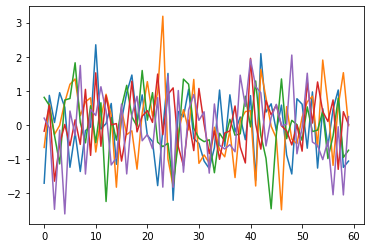

In [ ]:
x = np.random.randn(60, 5) # input provided are dimensions of the array that we want.
plt.plot(x);

# Pytorch Linear Regression

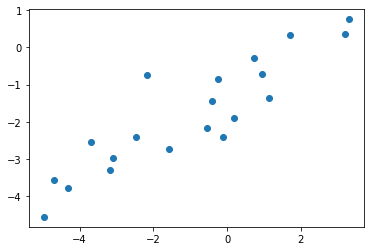

<class 'torch.Tensor'> torch.float32
hi <bound method Module.parameters of Linear(in_features=1, out_features=1, bias=True)>
Epoch 1/30, Loss:  4.4406
Epoch 2/30, Loss:  1.5339
Epoch 3/30, Loss:  0.8875
Epoch 4/30, Loss:  0.6857
Epoch 5/30, Loss:  0.5901
Epoch 6/30, Loss:  0.5317
Epoch 7/30, Loss:  0.4925
Epoch 8/30, Loss:  0.4655
Epoch 9/30, Loss:  0.4469
Epoch 10/30, Loss:  0.4339
Epoch 11/30, Loss:  0.4249
Epoch 12/30, Loss:  0.4186
Epoch 13/30, Loss:  0.4142
Epoch 14/30, Loss:  0.4112
Epoch 15/30, Loss:  0.4091
Epoch 16/30, Loss:  0.4077
Epoch 17/30, Loss:  0.4066
Epoch 18/30, Loss:  0.4059
Epoch 19/30, Loss:  0.4054
Epoch 20/30, Loss:  0.4051
Epoch 21/30, Loss:  0.4049
Epoch 22/30, Loss:  0.4047
Epoch 23/30, Loss:  0.4046
Epoch 24/30, Loss:  0.4045
Epoch 25/30, Loss:  0.4045
Epoch 26/30, Loss:  0.4044
Epoch 27/30, Loss:  0.4044
Epoch 28/30, Loss:  0.4044
Epoch 29/30, Loss:  0.4044
Epoch 30/30, Loss:  0.4043


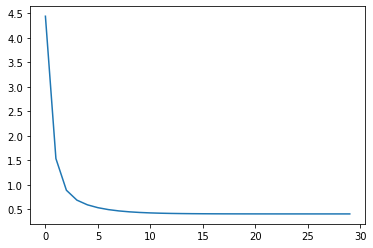

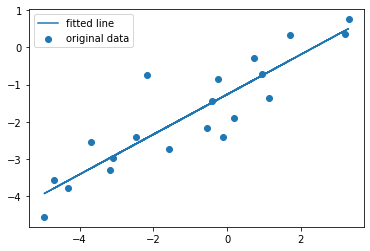

[[0.53867674]] [-1.2685204]


In [ ]:
# Linear Regression

#importing libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Dataset or generating data points 
# random data on the x-axis in (-5, +5)
X = np.random.random(20)*10 -5 # np.random.random(n) gives n uniformly distributed random numbers in range 0 to 1.
# a line plus some noise 
Y = 0.5 * X - 1 + np.random.randn(20) # np.random.randn(n) gives n normally distributed random numbers with mean 0 and stddev 1. Here it is Gaussian noise. We choose this over other noise because for this the true loss function is MSE and we are using MSE here.
N = len(X)
plt.scatter(X, Y)
plt.show() # if you do not write this then the plot will be shown at the bottom. This command is used to show the plot right here. 

# Array to Tensor
# In ML, we want our data to be of shape (num_samples * num_dimensions)
X = X.reshape(N, 1) # N is the no. of samples and 1 is no. of dimensions 
Y = Y.reshape(N, 1)
inputs = torch.from_numpy(X.astype("float32"))
targets = torch.from_numpy(Y.astype("float32"))
print(type(inputs), inputs.dtype)

# Create the linear regression model(building the model):
model = nn.Linear(1, 1) # this returns a 'Linear' object.
#print(model, type(model))

# Loss and optimizer
criterion = nn.MSELoss() # this returns a  'MSELoss' object.
#print(criterion, type(criterion)) 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1) # this returns a 'SGD' object.
#print(optimizer, type(optimizer))
#print(model.parameters)
 
# Train the model
n_epochs = 30
losses = []
for i in range(n_epochs):
  # Zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass 
  outputs = model(inputs) # this returns a rank 2, shape (N * 1) tensor. 
  loss = criterion(outputs, targets) # this returns a zero dimensional(rank 0) () tensor. 
  # keep the loss so we can plot it later
  losses.append(loss.item()) # loss.item() returns a float no. i.e., it converts zero dimensional loss tensor into a float.
  
  # Backward and optimize
  loss.backward()
  #print(model.weight.data.numpy()) # this returns current weight. in the first step it is just randomly chosen.
  #print(model.bias.data.numpy()) # this returns current bias. this is also randomly chosen in the beginning.
  optimizer.step() # this step updates the weight tensor(rank 2) and bias tensor(rank 1)
  #print(model.weight.data.numpy()) # this returns updated weight tensor
  #print(model.bias.data.numpy()) # this returns updated bias tensor
  
  print(f"Epoch {i+1}/{n_epochs}, Loss: {loss.item(): .4f}")

# plot the loss per iteration
plt.plot(losses);
plt.show()

# Making predictions 
#outputs = model(inputs)
predicted = model(inputs).detach().numpy() # model(inputs) returns a tensor while predicted is the same but as numpy array.

# plot the graph
plt.scatter(X, Y, label = "original data")
plt.plot(X, predicted, label = "fitted line")
plt.legend()
plt.show();

# show final parameters values
w = model.weight.data.numpy() # the reason we treat these differently(not using .detach()) from the model's predictions is because they are model parameters rather than data inputs or outputs.
b = model.bias.data.numpy() # model.weight and model.bias are both 'Parameter' objects. their data type is float32.
print(w, b) 

#PyTorch Regression (Moore's Law)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# get the data 
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

File ‘moore.csv’ already there; not retrieving.



In [ ]:
!ls 
!head moore.csv # here 'sample_data' is a directory. No header in 'mmore.csv'.

moore.csv  sample_data
1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


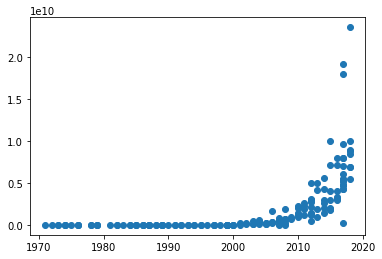

In [ ]:
data = pd.read_csv("moore.csv", header = None)
pandas_df_to_numpy_array = data.values # this converts a pandas dataframe into a numpy array.
X = pandas_df_to_numpy_array[:, 0].reshape(162, 1) # this is the use of numpy slicing. will return a one dimensional array. that's why we needed to reshape it to 2d array for both X and Y.
Y = pandas_df_to_numpy_array[:, 1].reshape(162, 1)
plt.scatter(X, Y);

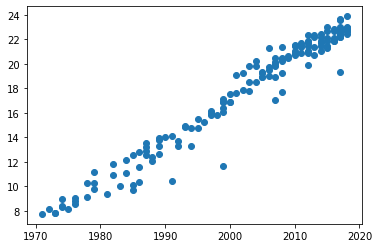

In [ ]:
Y = np.log(Y)
inputs = torch.from_numpy(X.astype("float32"))
targets = torch.from_numpy(Y.astype("float32"))
plt.scatter(inputs, targets); # so that means even torch tensors can be plotted and not just numpy arrays.

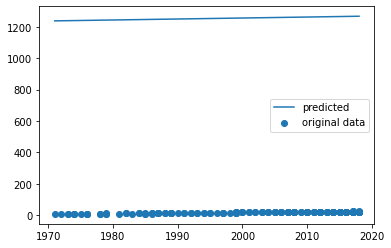

epoch 1/30, Loss: 1535270.625
epoch 2/30, Loss: 9.869745510888243e+17
epoch 3/30, Loss: 6.34501996341644e+29
epoch 4/30, Loss: inf
epoch 5/30, Loss: inf
epoch 6/30, Loss: inf
epoch 7/30, Loss: inf
epoch 8/30, Loss: inf
epoch 9/30, Loss: nan
epoch 10/30, Loss: nan
epoch 11/30, Loss: nan
epoch 12/30, Loss: nan
epoch 13/30, Loss: nan
epoch 14/30, Loss: nan
epoch 15/30, Loss: nan
epoch 16/30, Loss: nan
epoch 17/30, Loss: nan
epoch 18/30, Loss: nan
epoch 19/30, Loss: nan
epoch 20/30, Loss: nan
epoch 21/30, Loss: nan
epoch 22/30, Loss: nan
epoch 23/30, Loss: nan
epoch 24/30, Loss: nan
epoch 25/30, Loss: nan
epoch 26/30, Loss: nan
epoch 27/30, Loss: nan
epoch 28/30, Loss: nan
epoch 29/30, Loss: nan
epoch 30/30, Loss: nan


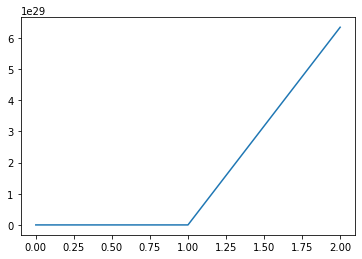

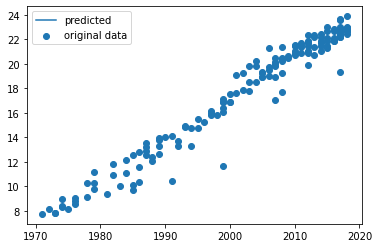

[[nan]] [nan]


In [ ]:
# without normalization
model = nn.Linear(1,1)
plt.scatter(inputs, targets, label = "original data");
plt.plot(inputs, model(inputs).detach(), label = "predicted"); # .detach just removes the grad from the tensor 'model(inputs)'. values of both will remain the same. Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead. but we can call numpy on tensors other than that.
# why is the predicted line in this plot always at the top of the screen?
plt.legend()
plt.show()
#print(model(inputs) == model(inputs).detach())
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
n_epochs = 30
losses = []
for iteration in range(n_epochs):
  optimizer.zero_grad()
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()
  print(f"epoch {iteration + 1}/{n_epochs}, Loss: {loss.item()}")

plt.plot(losses);
plt.show()
plt.scatter(inputs, targets, label = "original data");
plt.plot(inputs, model(inputs).detach(), label = "predicted");
plt.legend()
plt.show()
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)
# so the convergence did not happen because we did not normalize the data. so the data remained containing inf and NaN values? ot that these inf and NaN values are automatically omitted so they don't disturb anything? or does these values have to dealt with for the model to converge?

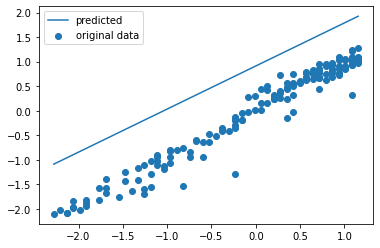

epoch 1/30, Loss: 0.880172610282898
epoch 2/30, Loss: 0.5770988464355469
epoch 3/30, Loss: 0.3831242322921753
epoch 4/30, Loss: 0.2589755058288574
epoch 5/30, Loss: 0.17951726913452148
epoch 6/30, Loss: 0.12866201996803284
epoch 7/30, Loss: 0.09611338376998901
epoch 8/30, Loss: 0.07528142631053925
epoch 9/30, Loss: 0.06194842979311943
epoch 10/30, Loss: 0.05341499298810959
epoch 11/30, Loss: 0.047953374683856964
epoch 12/30, Loss: 0.04445779323577881
epoch 13/30, Loss: 0.04222053289413452
epoch 14/30, Loss: 0.04078862816095352
epoch 15/30, Loss: 0.0398721769452095
epoch 16/30, Loss: 0.03928562253713608
epoch 17/30, Loss: 0.038910217583179474
epoch 18/30, Loss: 0.03866994008421898
epoch 19/30, Loss: 0.03851616010069847
epoch 20/30, Loss: 0.03841773793101311
epoch 21/30, Loss: 0.038354743272066116
epoch 22/30, Loss: 0.03831442445516586
epoch 23/30, Loss: 0.03828861564397812
epoch 24/30, Loss: 0.03827210143208504
epoch 25/30, Loss: 0.0382615327835083
epoch 26/30, Loss: 0.03825477138161659

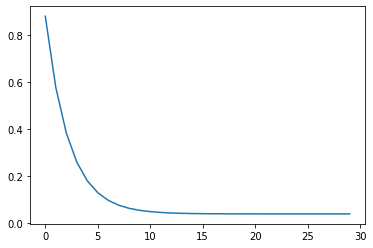

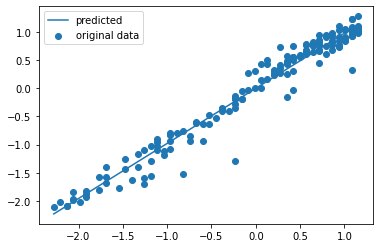

[[0.98043734]] [0.00112706]


In [ ]:
# with normalization
std_dev_inputs = torch.std_mean(inputs)[0]
std_dev_targets = torch.std_mean(targets)[0]
inputs = (inputs - (torch.std_mean(inputs)[1]))/ std_dev_inputs
targets = (targets - (torch.std_mean(targets)[1]))/ std_dev_targets
model = nn.Linear(1,1)
plt.scatter(inputs, targets, label = "original data");
plt.plot(inputs, model(inputs).detach(), label = "predicted");
plt.legend()
plt.show()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
n_epochs = 30
losses = []
for iteration in range(n_epochs):
  optimizer.zero_grad()
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()
  print(f"epoch {iteration + 1}/{n_epochs}, Loss: {loss.item()}")
plt.plot(losses);
plt.show()
plt.scatter(inputs, targets, label = "original data");
plt.plot(inputs, model(inputs).detach(), label = "predicted"); # .detach() is written so that model(inputs) is not tracked in the computation graph.
plt.legend()
plt.show()
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)
# so the model converged because we normalized the data before training starts.

In [ ]:
""" since (C = C_naught * r ** t) is the equation for exponential increase in the no. of transistors C over time t. Let's at time t , C = C and at t', C = 2C then 
   t'-t = log(2)/log(r)   is the time duration for no. of transistors to double. Also, log(r) = (stddev(inputs)/stddev(targets))*w . 
   Here stddev(inputs) and stddev(targets) are calculated for values of inputs and targets just before they are normalized. 
   Also w is the weight of the trained model after inputs are targets are normalized i.e., last value of the above cell. """

log_r = (std_dev_targets / std_dev_inputs) * w
time_duration = np.log(2)/log_r 
time_duration.item()

2.0289063453674316

In [ ]:
# we can see that every 2 years the no. of transistors on microchips double.

# Boston Housing Price Prediction( Regression)

In [ ]:
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# data 
!wget https://lazyprogrammer.me/course_files/exercises/boston.txt

--2021-05-23 04:18:20--  https://lazyprogrammer.me/course_files/exercises/boston.txt
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘boston.txt’

boston.txt              [ <=>                ]  50.05K  --.-KB/s    in 0.003s  

2021-05-23 04:18:21 (15.6 MB/s) - ‘boston.txt’ saved [51256]



In [ ]:
!ls 

boston.txt  sample_data


In [ ]:
!head boston.txt

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town


In [87]:
# importing libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [88]:
data = datasets.load_boston()
X, Y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)

sc = StandardScaler() # if you don't write this here and directly use StandardScaler() on the next lines then you get this -> NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
#sc = StandardScaler()
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)
X_train = torch.from_numpy(X_train.astype('float32'))
X_test = torch.from_numpy(X_test.astype('float32'))
y_train = torch.from_numpy(y_train.astype('float32'))
y_test = torch.from_numpy(y_test.astype('float32'))

In [89]:
# model 
n_samples, n_features = X_train.shape 
model = nn.Linear(n_features,1)

In [90]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)

epoch 1, loss: 2.09310
epoch 11, loss: 0.41872
epoch 21, loss: 0.33335
epoch 31, loss: 0.31429
epoch 41, loss: 0.30450
epoch 51, loss: 0.29809
epoch 61, loss: 0.29355
epoch 71, loss: 0.29020
epoch 81, loss: 0.28766
epoch 91, loss: 0.28567


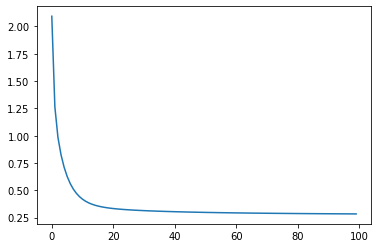

Parameter containing:
tensor([[-6.9854e-02,  1.0476e-01, -6.2123e-02,  9.8867e-02, -1.9847e-01,
          2.5004e-01, -1.2996e-02, -3.1931e-01,  1.0150e-01,  4.0471e-05,
         -2.3104e-01,  1.1289e-01, -4.2093e-01]], requires_grad=True) Parameter containing:
tensor([-2.4511e-06], requires_grad=True)
0.2868669927120209


In [91]:
# training loop
n_epochs = 100
losses = []
for epoch in range(n_epochs):
  predicted = model(X_train)
  loss = criterion(predicted, y_train)
  with torch.no_grad():
    losses.append(loss.item())
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (epoch % 10) == 0:
    print(f"epoch {epoch+1}, loss: {loss.item():.5f}")
plt.plot(losses);
plt.show()
[w, b] = model.parameters()
print(w, b)
with torch.no_grad():
  loss = criterion(model(X_test), y_test)
  print(loss.item())

just checking somethings

In [ ]:
x = torch.rand(2,2, dtype = torch.float64)
print(x)
y = torch.rand(2,2, dtype = torch.double)
print(x + y)
y.add_(x)
print(x.add_(y))

tensor([[0.9036, 0.1950],
        [0.2756, 0.0615]], dtype=torch.float64)
tensor([[1.3756, 0.6672],
        [0.6662, 0.6698]], dtype=torch.float64)
tensor([[2.2792, 0.8622],
        [0.9418, 0.7313]], dtype=torch.float64)


# Linear regression manually from scratch with just numpy

In [ ]:
import numpy as np
X = np.array([1,2,3,4], dtype = np.float32)
Y = np.array([2,4,6,8], dtype = np.float32)
# 5 is the test sample and 10 is the output for that
w = 0.0
#model
def forward_pass(x):
  return w*x

def loss(y_predicted, y):
  return np.mean((y_predicted - y)**2)

def gradient(x, y, y_predicted):
  return np.mean(np.dot(2*x, (y_predicted - y)))

print(f"before training f(5): {forward_pass(5):.3f}, loss: {loss(forward_pass(5), 10):.3f}")

#training
learning_rate = 0.01
n_iterations = 15
for epoch in range(n_iterations):
  output = forward_pass(X)
  l = loss(output, Y)
  dw = gradient(X, Y, output)
  w -= learning_rate*dw
  if epoch%1 == 0:
    print(f"epoch {epoch+1}/{n_iterations}, weight: {w:.3f}, loss: {l:.3f}")
print(f"after training f(5): {forward_pass(5):.3f}, loss: {loss(forward_pass(5), 10):.3f}")

before training f(5): 0.000, loss: 100.000
epoch 1/15, weight: 1.200, loss: 30.000
epoch 2/15, weight: 1.680, loss: 4.800
epoch 3/15, weight: 1.872, loss: 0.768
epoch 4/15, weight: 1.949, loss: 0.123
epoch 5/15, weight: 1.980, loss: 0.020
epoch 6/15, weight: 1.992, loss: 0.003
epoch 7/15, weight: 1.997, loss: 0.001
epoch 8/15, weight: 1.999, loss: 0.000
epoch 9/15, weight: 1.999, loss: 0.000
epoch 10/15, weight: 2.000, loss: 0.000
epoch 11/15, weight: 2.000, loss: 0.000
epoch 12/15, weight: 2.000, loss: 0.000
epoch 13/15, weight: 2.000, loss: 0.000
epoch 14/15, weight: 2.000, loss: 0.000
epoch 15/15, weight: 2.000, loss: 0.000
after training f(5): 10.000, loss: 0.000


# Linear regression with pytorch

In [ ]:
import torch
X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8], dtype = torch.float32)
# 5 is the test sample and 10 is the output for that
w = torch.tensor(0, dtype = torch.float32, requires_grad = True)
#model
def forward_pass(x):
  return w*x

def loss(y_predicted, y):
  return torch.mean((y_predicted - y)**2)

print(f"before training f(5): {forward_pass(5):.3f}, loss: {loss(forward_pass(5), 10):.3f}")

#training
learning_rate = 0.01
n_iterations = 100
for epoch in range(n_iterations):
  output = forward_pass(X)
  l = loss(output, Y)
  l.backward()
  with torch.no_grad(): # write this else the next line of code will give this error-> RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.
    w -= learning_rate*w.grad
  w.grad.zero_()
  if epoch % 10 == 0:
    print(f"epoch {epoch+1}/{n_iterations}, weight: {w:.3f}, loss: {l:.3f}")
print(f"after training f(5): {forward_pass(5):.3f}, loss: {loss(forward_pass(5), 10):.3f}") # so backprop is not as exact as numerical gradient computation

before training f(5): 0.000, loss: 100.000
epoch 1/100, weight: 0.300, loss: 30.000
epoch 11/100, weight: 1.665, loss: 1.163
epoch 21/100, weight: 1.934, loss: 0.045
epoch 31/100, weight: 1.987, loss: 0.002
epoch 41/100, weight: 1.997, loss: 0.000
epoch 51/100, weight: 1.999, loss: 0.000
epoch 61/100, weight: 2.000, loss: 0.000
epoch 71/100, weight: 2.000, loss: 0.000
epoch 81/100, weight: 2.000, loss: 0.000
epoch 91/100, weight: 2.000, loss: 0.000
after training f(5): 10.000, loss: 0.000


# general training pipeline

1.   design model(input, output size, forward pass)
2.   construct loss and optimizer
3.   Training loop
   - forward pass: compute prediction
   - backward pass: gradients
   - update weights




# 1- linear regression with complete pytorch pipeline without using pytorch model

In [ ]:
import torch
import torch.nn as nn
X = torch.tensor([1,2,3,4], dtype = torch.float32) # we will need our input to be 2-dimensional only when using pytorch model
Y = torch.tensor([2,4,6,8], dtype = torch.float32)
# 5 is the test sample and 10 is the output for that
w = torch.tensor(0, dtype = torch.float32, requires_grad = True)
#model
def forward_pass(x):
  return w*x

loss = nn.MSELoss()

print(f"before training f(5): {forward_pass(5):.3f}")
#training
learning_rate = 0.01
n_iterations = 100
optimizer = torch.optim.SGD([w], lr = learning_rate)
for epoch in range(n_iterations):
  output = forward_pass(X)
  l = loss(output, Y)
  l.backward()        
  optimizer.step()
  optimizer.zero_grad()
  if epoch % 10 == 0:
    print(f"epoch {epoch+1}/{n_iterations}, weight: {w:.3f}, loss: {l:.3f}")
print(f"after training f(5): {forward_pass(5):.3f}") # so backprop is not as exact as numerical gradient computation
# why does this line of code not work? ->  print(f"loss: {loss(forward_pass(5), 10):.3f}")

before training f(5): 0.000
epoch 1/100, weight: 0.300, loss: 30.000
epoch 11/100, weight: 1.665, loss: 1.163
epoch 21/100, weight: 1.934, loss: 0.045
epoch 31/100, weight: 1.987, loss: 0.002
epoch 41/100, weight: 1.997, loss: 0.000
epoch 51/100, weight: 1.999, loss: 0.000
epoch 61/100, weight: 2.000, loss: 0.000
epoch 71/100, weight: 2.000, loss: 0.000
epoch 81/100, weight: 2.000, loss: 0.000
epoch 91/100, weight: 2.000, loss: 0.000
after training f(5): 10.000


# 2-  ------ Now using pytorch model

In [ ]:
import torch
import torch.nn as nn
X = torch.tensor([1,2,3,4], dtype = torch.float32).reshape(4,1) # we will need our input to be 2-dimensional only when using pytorch model
Y = torch.tensor([2,4,6,8], dtype = torch.float32).reshape(4,1)
# [5] is the test sample and 10 is the output for that
test_sample = torch.tensor([5], dtype = torch.float32)
test_outcome = torch.tensor([10], dtype = torch.float32)
# model
n_samples, n_features = X.shape
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)
loss = nn.MSELoss()

print(f"before training f(5): {model(test_sample).item():.3f}") # correct output is [10]. And -> torch.tensor([10]).item() == 10
#training
learning_rate = 0.01
n_iterations = 100
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
[w, b] = model.parameters()
print(list(model.parameters())) # it's output without writing 'list' is -> <generator object Module.parameters at 0x7fc987dfe850>
for epoch in range(n_iterations):
  output = model(X)
  l = loss(output, Y)
  l.backward()        
  optimizer.step()
  optimizer.zero_grad()
  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f"epoch {epoch+1}/{n_iterations}, weight: {w[0][0].item():.3f}, loss: {l:.3f}") # this could also have worked -> weight: {w[0][0]:.3f}
    #loss is scalar
print(f"after training f(5): {model(test_sample).item():.3f}, loss: {loss(model(test_sample), test_outcome):.8f}") # so backprop is not as exact as numerical gradient computation

before training f(5): -0.453
[Parameter containing:
tensor([[0.0314]], requires_grad=True), Parameter containing:
tensor([-0.6099], requires_grad=True)]
epoch 1/100, weight: 0.357, loss: 35.442
epoch 11/100, weight: 1.721, loss: 0.917
epoch 21/100, weight: 1.941, loss: 0.024
epoch 31/100, weight: 1.977, loss: 0.001
epoch 41/100, weight: 1.983, loss: 0.000
epoch 51/100, weight: 1.984, loss: 0.000
epoch 61/100, weight: 1.985, loss: 0.000
epoch 71/100, weight: 1.985, loss: 0.000
epoch 81/100, weight: 1.986, loss: 0.000
epoch 91/100, weight: 1.986, loss: 0.000
after training f(5): 9.972, loss: 0.00077001


In [ ]:
print(torch.tensor([5]).item())
print(torch.tensor([[5]])[0][0])

5
tensor(5)


# Linear Regression

In [ ]:
import torch 
import torch.nn as nn 
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

epoch 10/100, loss: 4362.66503906
epoch 20/100, loss: 3257.53759766
epoch 30/100, loss: 2457.22998047
epoch 40/100, loss: 1877.08361816
epoch 50/100, loss: 1456.14294434
epoch 60/100, loss: 1150.45654297
epoch 70/100, loss: 928.29193115
epoch 80/100, loss: 766.71118164
epoch 90/100, loss: 649.11505127
epoch 100/100, loss: 563.47723389


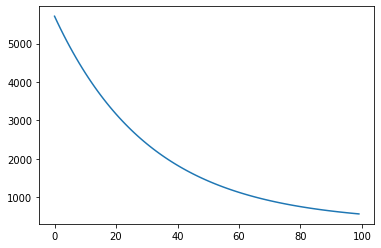

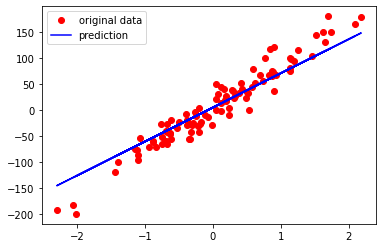

In [ ]:
# Data
X_numpy, Y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state=1)
X = torch.from_numpy(X_numpy.astype('float32'))
Y = torch.from_numpy(Y_numpy.astype('float32'))
Y = Y.reshape(Y.shape[0], 1)
#X = (X - (torch.std_mean(X)[1]))/torch.std_mean(X)[0] # why is normalization giving a bad fit?
#Y = (Y - (torch.std_mean(Y)[1]))/torch.std_mean(Y)[0]
n_samples, n_features = X.shape

# Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# Training
n_epochs = 100
losses = []
for it in range(n_epochs):
  predicted = model(X)
  loss = criterion(predicted, Y)
  loss.backward()
  with torch.no_grad():
    losses.append(loss.item())
  optimizer.step()
  optimizer.zero_grad()
  if (it+1) % 10 == 0: 
    print(f"epoch {it+1}/{n_epochs}, loss: {loss.item():.8f}")
plt.plot(losses);
plt.show()
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro', label = "original data");
plt.plot(X_numpy, predicted, color = 'b', label = "prediction");
plt.legend()
plt.show()

# Logistic Regression

In [ ]:
# importing libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# preparing data
bc = datasets.load_breast_cancer() # this will return <class 'sklearn.utils.Bunch'>
X, y = bc.data, bc.target # this will return two numpy arrays
n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234) # if you don't write random_state then the order of the data points will keep changing.
# scale 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
""" In layman's terms, fit_transform means to do some calculation and then do transformation (say calculating the means of columns from some data and then replacing the missing values). So for training set, you need to both calculate and do transformation. 
But for testing set, Machine learning applies prediction based on what was learned during the training set and so it doesn't need to calculate, it just performs the transformation. """
# We do not transform y_train and y_test because they contain only 0 and 1.

X_train = torch.from_numpy(X_train.astype('float32'))
X_test = torch.from_numpy(X_test.astype('float32'))
#print(type(X_test.shape[0])) # this is class int
y_train = torch.from_numpy(y_train.astype('float32'))
y_test = torch.from_numpy(y_test.astype('float32'))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [ ]:
"""
Help on class Module in module torch.nn.modules.module:

class Module(builtins.object)
 |  Base class for all neural network modules.
 |  
 |  Your models should also subclass this class.
 |  
 |  Modules can also contain other Modules, allowing to nest them in
 |  a tree structure. You can assign the submodules as regular attributes::
 |  
 |      import torch.nn as nn
 |      import torch.nn.functional as F
 |  
 |      class Model(nn.Module):
 |          def __init__(self):
 |              super(Model, self).__init__()
 |              self.conv1 = nn.Conv2d(1, 20, 5)
 |              self.conv2 = nn.Conv2d(20, 20, 5)
 |  
 |          def forward(self, x):
 |              x = F.relu(self.conv1(x))
 |              return F.relu(self.conv2(x))
""";

In [ ]:
# Model
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1, bias = True)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features) 
#print(torch.sigmoid(model1(X_train)) == model(X_train)) # torch.sigmoid(model1(X_train)) == model(X_train) == model.forward(X_train) 
#print(model.forward(X_train) == model(X_train)) # so all three of them are the same.


In [ ]:
# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)

In [ ]:
# Training loop
n_epochs = 500
for epoch in range(n_epochs):
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (epoch) % 10 == 0:
    print(f"epoch {epoch + 1}, loss: {loss.item():.4f}")

# calculate accuracy
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_class = y_predicted.round()
  accuracy = (y_predicted_class == y_test).sum().item()/(X_test.shape[0]) # if we do not write .item(), then the answer(accuracy) will be the same, just that it will be a tensor. if we use .item() then the answer will be in float. 
  #accuracy = (y_predicted_class.eq(y_test).sum().item()/(X_test.shape[0]) # this is another way to do the same as above.
  print(f"accuracy: {accuracy:.4f}")

epoch 1, loss: 0.9228
epoch 11, loss: 0.3766
epoch 21, loss: 0.2691
epoch 31, loss: 0.2185
epoch 41, loss: 0.1878
epoch 51, loss: 0.1669
epoch 61, loss: 0.1516
epoch 71, loss: 0.1400
epoch 81, loss: 0.1310
epoch 91, loss: 0.1237
epoch 101, loss: 0.1177
epoch 111, loss: 0.1127
epoch 121, loss: 0.1084
epoch 131, loss: 0.1046
epoch 141, loss: 0.1013
epoch 151, loss: 0.0984
epoch 161, loss: 0.0958
epoch 171, loss: 0.0935
epoch 181, loss: 0.0914
epoch 191, loss: 0.0894
epoch 201, loss: 0.0876
epoch 211, loss: 0.0860
epoch 221, loss: 0.0845
epoch 231, loss: 0.0830
epoch 241, loss: 0.0817
epoch 251, loss: 0.0805
epoch 261, loss: 0.0793
epoch 271, loss: 0.0782
epoch 281, loss: 0.0772
epoch 291, loss: 0.0762
epoch 301, loss: 0.0752
epoch 311, loss: 0.0744
epoch 321, loss: 0.0735
epoch 331, loss: 0.0727
epoch 341, loss: 0.0719
epoch 351, loss: 0.0712
epoch 361, loss: 0.0705
epoch 371, loss: 0.0698
epoch 381, loss: 0.0692
epoch 391, loss: 0.0686
epoch 401, loss: 0.0680
epoch 411, loss: 0.0674
epo